<div id="container" style="position:relative;">
<div style="float:left"><h1>  

# weCAN: A Cancer Survivability Predictor

## Modelling and Feature Engineering Iteration (In Use)

#### Author: Rahim Kaba
#### Contact: rkaba91@gmail.com
#### Date: Sept-Dec 2023
    
</h1></div>
    
<div style="position:relative; float:right">
  <img style="height:65px" src="/Cancer_Survivability_Predictor/Images/weCAN.jpg"/>
</div>    

## Introduction:

In this notebook, we will be doing the first iterations of ML modelling as a classification model. There will be some feature engineering along with baseline models and minimal hyperparameter tuning. This notebook will guide me to my final iterations of modelling as well as hyperparameter tuning for the best models and further feature selection and engineering.

## Table of Contents
---
1. [Loading and Setup](#loadingandsetup)
2. [Brief Data Assessment](#assessment)
3. [Feature Engineering (First Iteration)](#fa)
4. [Baseline Modelling](#model)
5. [Conclusions and Next Steps](#conclusions)

## Loading and Setup <a class="anchor" id="loadingandsetup"></a>

In [1]:
#load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

#filter warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#load csv
df= pd.read_csv('/Users/RahimKaba/Desktop/Cancer_Survivability_Predictor/Data/cancer_data_clean.csv', index_col='Sample ID')

## Brief Data Assessment <a class="anchor" id="assessment"></a>

In [3]:
#drop auto assigned index
df=df.drop(columns = 'Unnamed: 0')

In [4]:
#inspect the data
df.head()

,Age at Sequencing,Age at Surgical Procedure,Cancer Type,Cancer Type Detailed,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,Distant Mets: Bone,Distant Mets: Bowel,Distant Mets: Breast,Distant Mets: CNS/Brain,Distant Mets: Distant LN,Distant Mets: Female Genital,Distant Mets: Head and Neck,Distant Mets: Intra-Abdominal,Distant Mets: Kidney,Distant Mets: Liver,Distant Mets: Lung,Distant Mets: Male Genital,Distant Mets: Mediastinum,Distant Mets: Ovary,Distant Mets: Pleura,Distant Mets: PNS,Distant Mets: Skin,Distant Mets: Unspecified,Fraction Genome Altered,Gene Panel,Metastatic patient,Met Count,Met Site Count,MSI Score,MSI Type,Oncotree Code,Organ System,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Race Category,Sample coverage,Sample Type,Sex,Subtype,Subtype Abbreviation,TMB (nonsynonymous),Tumor Purity,Average Age
Sample ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P-0000004-T01-IM3,39.74,37.03,Breast Cancer,Breast Invasive Ductal Carcinoma,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,0.2782,IMPACT341,True,2,2,2.50,Stable,IDC,Breast,3.78,1:DECEASED,Breast,White,428,Primary,Female,Breast Ductal HR+HER2-,IDC HR+HER2-,4.436621,50.0,39.1225
P-0000015-T01-IM3,44.44,44.42,Breast Cancer,Breast Invasive Ductal Carcinoma,No,No,No,Yes,No,No,Yes,Yes,No,No,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,0.3503,IMPACT341,True,8,8,2.55,Stable,IDC,Breast,13.90,1:DECEASED,Breast,White,281,Metastasis,Female,Breast Ductal HR+HER2-,IDC HR+HER2-,7.764087,40.0,44.6775
P-0000024-T01-IM3,61.33,61.00,Endometrial Cancer,Uterine Endometrioid Carcinoma,No,No,No,Yes,No,No,No,No,No,No,Yes,No,Yes,Yes,No,No,No,No,No,No,Yes,0.3878,IMPACT341,True,8,5,0.72,Stable,UEC,Gynecologic,35.06,1:DECEASED,Uterus,White,1016,Metastasis,Female,Uterine Endometrioid,UCEC ENDO,6.654932,40.0,61.5050
P-0000025-T02-IM5,74.81,74.64,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,Yes,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,No,Yes,0.1020,IMPACT410,True,13,8,0.15,Stable,USC,Gynecologic,46.00,1:DECEASED,Uterus,White,1147,Metastasis,Female,Uterine Serous,UCEC SEROUS,1.957439,30.0,73.9075
P-0000026-T01-IM3,71.72,71.58,Endometrial Cancer,Uterine Endometrioid Carcinoma,No,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,No,No,No,Yes,0.4196,IMPACT341,True,11,7,1.23,Stable,UEC,Gynecologic,80.59,0:LIVING,Uterus,Asian-far east/indian subcont,1222,Metastasis,Female,Uterine Endometrioid,UCEC ENDO,4.436621,10.0,72.5350


In [5]:
#check the nulls
df.isna().sum()

Age at Sequencing                0
Age at Surgical Procedure        0
Cancer Type                      0
Cancer Type Detailed             0
Distant Mets: Adrenal Gland      0
Distant Mets: Biliary tract      0
Distant Mets: Bladder/UT         0
Distant Mets: Bone               0
Distant Mets: Bowel              0
Distant Mets: Breast             0
Distant Mets: CNS/Brain          0
Distant Mets: Distant LN         0
Distant Mets: Female Genital     0
Distant Mets: Head and Neck      0
Distant Mets: Intra-Abdominal    0
Distant Mets: Kidney             0
Distant Mets: Liver              0
Distant Mets: Lung               0
Distant Mets: Male Genital       0
Distant Mets: Mediastinum        0
Distant Mets: Ovary              0
Distant Mets: Pleura             0
Distant Mets: PNS                0
Distant Mets: Skin               0
Distant Mets: Unspecified        0
Fraction Genome Altered          0
Gene Panel                       0
Metastatic patient               0
Met Count           

In [6]:
#drop the rows with null values
df = df.dropna()

In [7]:
#sanity check
df.isna().sum()

Age at Sequencing                0
Age at Surgical Procedure        0
Cancer Type                      0
Cancer Type Detailed             0
Distant Mets: Adrenal Gland      0
Distant Mets: Biliary tract      0
Distant Mets: Bladder/UT         0
Distant Mets: Bone               0
Distant Mets: Bowel              0
Distant Mets: Breast             0
Distant Mets: CNS/Brain          0
Distant Mets: Distant LN         0
Distant Mets: Female Genital     0
Distant Mets: Head and Neck      0
Distant Mets: Intra-Abdominal    0
Distant Mets: Kidney             0
Distant Mets: Liver              0
Distant Mets: Lung               0
Distant Mets: Male Genital       0
Distant Mets: Mediastinum        0
Distant Mets: Ovary              0
Distant Mets: Pleura             0
Distant Mets: PNS                0
Distant Mets: Skin               0
Distant Mets: Unspecified        0
Fraction Genome Altered          0
Gene Panel                       0
Metastatic patient               0
Met Count           

**Observations**:

---
There was 4 null values in sex we have removed these now there are no more null values present

## Feature Engineering (First Iteration):<a class="anchor" id="fa"></a>

---

We will take a look at the features after the EDA to determine which features need to be kept, dropped or transformed. Relevant knowledge in the problem space will help to guide these decisions at first. Then we will look at some baseline modelling to see how they perform. After this, more feature selection will be performed based on hypothesis testing.

- H0 (Null hypothesis): The features selected do not significantly contribute to the model's performance
- H1 (Alternate hypothesis): The features selected do significantly contribute to the model's performance

We will look at the p-values after the initial round of feature selection to determine if we can reject the H0 and accept the H1. This will be done by setting a thrshold of p<0.05. Any features with p>0.05 will be dropped till this H0 can be rejected.

### Categorical Features:

Next we will take care of the categorical variables:

- First we will encode the `Distant Mets` Columns as these can be quite important in prediciting survivability, especially if the mets are present in vital organs. We want to keep these features and use some of them in modeling. We will binary encode them, Yes = 1, No = 0.

In [8]:
#check which columns are categorical so we know how to deal with them
df.select_dtypes(include = ['object']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Cancer Type                    25771 non-null  object
 1   Cancer Type Detailed           25771 non-null  object
 2   Distant Mets: Adrenal Gland    25771 non-null  object
 3   Distant Mets: Biliary tract    25771 non-null  object
 4   Distant Mets: Bladder/UT       25771 non-null  object
 5   Distant Mets: Bone             25771 non-null  object
 6   Distant Mets: Bowel            25771 non-null  object
 7   Distant Mets: Breast           25771 non-null  object
 8   Distant Mets: CNS/Brain        25771 non-null  object
 9   Distant Mets: Distant LN       25771 non-null  object
 10  Distant Mets: Female Genital   25771 non-null  object
 11  Distant Mets: Head and Neck    25771 non-null  object
 12  Distant Mets: Intra-Abdominal  25771 

In [9]:
#check that the word distant is in all the mets columns
for column in df.columns:
    if 'distant' in column.lower():
        print(df[column].value_counts())

Distant Mets: Adrenal Gland
No     23963
Yes     1808
Name: count, dtype: int64
Distant Mets: Biliary tract
No     23103
Yes     2668
Name: count, dtype: int64
Distant Mets: Bladder/UT
No     23947
Yes     1824
Name: count, dtype: int64
Distant Mets: Bone
No     18574
Yes     7197
Name: count, dtype: int64
Distant Mets: Bowel
No     22559
Yes     3212
Name: count, dtype: int64
Distant Mets: Breast
No     25463
Yes      308
Name: count, dtype: int64
Distant Mets: CNS/Brain
No     22850
Yes     2921
Name: count, dtype: int64
Distant Mets: Distant LN
No     19722
Yes     6049
Name: count, dtype: int64
Distant Mets: Female Genital
No     23695
Yes     2076
Name: count, dtype: int64
Distant Mets: Head and Neck
No     25381
Yes      390
Name: count, dtype: int64
Distant Mets: Intra-Abdominal
No     19612
Yes     6159
Name: count, dtype: int64
Distant Mets: Kidney
No     24897
Yes      874
Name: count, dtype: int64
Distant Mets: Liver
No     16979
Yes     8792
Name: count, dtype: int64
Distan

In [10]:
#next map yes = 1 and no = 0 to the distant mets columns

for column in df.columns:
    #iterate through the columns in the data frame and find columns that have the word distant in them. if they do then change the yes to 1 and no to 0
    if 'distant' in column.lower():
        df[column] = df[column].map({'Yes': 1, 'No': 0})

In [11]:
#sanity check
df.head()

,Age at Sequencing,Age at Surgical Procedure,Cancer Type,Cancer Type Detailed,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,Distant Mets: Bone,Distant Mets: Bowel,Distant Mets: Breast,Distant Mets: CNS/Brain,Distant Mets: Distant LN,Distant Mets: Female Genital,Distant Mets: Head and Neck,Distant Mets: Intra-Abdominal,Distant Mets: Kidney,Distant Mets: Liver,Distant Mets: Lung,Distant Mets: Male Genital,Distant Mets: Mediastinum,Distant Mets: Ovary,Distant Mets: Pleura,Distant Mets: PNS,Distant Mets: Skin,Distant Mets: Unspecified,Fraction Genome Altered,Gene Panel,Metastatic patient,Met Count,Met Site Count,MSI Score,MSI Type,Oncotree Code,Organ System,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Race Category,Sample coverage,Sample Type,Sex,Subtype,Subtype Abbreviation,TMB (nonsynonymous),Tumor Purity,Average Age
Sample ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P-0000004-T01-IM3,39.74,37.03,Breast Cancer,Breast Invasive Ductal Carcinoma,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.2782,IMPACT341,True,2,2,2.50,Stable,IDC,Breast,3.78,1:DECEASED,Breast,White,428,Primary,Female,Breast Ductal HR+HER2-,IDC HR+HER2-,4.436621,50.0,39.1225
P-0000015-T01-IM3,44.44,44.42,Breast Cancer,Breast Invasive Ductal Carcinoma,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0.3503,IMPACT341,True,8,8,2.55,Stable,IDC,Breast,13.90,1:DECEASED,Breast,White,281,Metastasis,Female,Breast Ductal HR+HER2-,IDC HR+HER2-,7.764087,40.0,44.6775
P-0000024-T01-IM3,61.33,61.00,Endometrial Cancer,Uterine Endometrioid Carcinoma,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0.3878,IMPACT341,True,8,5,0.72,Stable,UEC,Gynecologic,35.06,1:DECEASED,Uterus,White,1016,Metastasis,Female,Uterine Endometrioid,UCEC ENDO,6.654932,40.0,61.5050
P-0000025-T02-IM5,74.81,74.64,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0.1020,IMPACT410,True,13,8,0.15,Stable,USC,Gynecologic,46.00,1:DECEASED,Uterus,White,1147,Metastasis,Female,Uterine Serous,UCEC SEROUS,1.957439,30.0,73.9075
P-0000026-T01-IM3,71.72,71.58,Endometrial Cancer,Uterine Endometrioid Carcinoma,0,0,0,0,1,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0.4196,IMPACT341,True,11,7,1.23,Stable,UEC,Gynecologic,80.59,0:LIVING,Uterus,Asian-far east/indian subcont,1222,Metastasis,Female,Uterine Endometrioid,UCEC ENDO,4.436621,10.0,72.5350


Next we will encode the `Overall Surivival Status` feature. We will also rename this feature to be more informative to `Overall Survival Status: Living`. If the patient died during the study, they are not living and therefore will be 0 and if they are living they will be 1. This is opposite of the values that were written in the original feature, but I think it is more informative if we have it in this way.

In [12]:
#check the values of the column
df['Overall Survival Status'].value_counts()

Overall Survival Status
0:LIVING      15602
1:DECEASED    10169
Name: count, dtype: int64

In [13]:
#change the values
df['Overall Survival Status'] = df['Overall Survival Status'].map({'0:LIVING': 1, '1:DECEASED': 0})

In [14]:
#rename the column to make it more informative:
df.rename(columns={'Overall Survival Status': 'Overall Survival Status: Living'}, inplace=True)

In [15]:
# sanity check
df['Overall Survival Status: Living'].value_counts()

Overall Survival Status: Living
1    15602
0    10169
Name: count, dtype: int64

In [16]:
#check the number of categorical columns that remain
categorical_columns = df.select_dtypes(include = ['object'])
categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cancer Type           25771 non-null  object
 1   Cancer Type Detailed  25771 non-null  object
 2   Gene Panel            25771 non-null  object
 3   MSI Type              25771 non-null  object
 4   Oncotree Code         25771 non-null  object
 5   Organ System          25771 non-null  object
 6   Primary Tumor Site    25771 non-null  object
 7   Race Category         25771 non-null  object
 8   Sample Type           25771 non-null  object
 9   Sex                   25771 non-null  object
 10  Subtype               25771 non-null  object
 11  Subtype Abbreviation  25771 non-null  object
dtypes: object(12)
memory usage: 2.6+ MB


In [17]:
len(df['Cancer Type Detailed'].unique())

84

In [18]:
len(df['Subtype'].unique())

50

In [19]:
len(df['Primary Tumor Site'].unique())

188

After the encoding above, there are 12 more categorical columns that remain. Lets take a look at them in detail and see which are important for modeling.

In [20]:
#lets take a look at what values these columns contain so we can determine how to deal with them
for column in categorical_columns:
    print(f'{column.upper()} VALUES:\n{"-" * (len(column) + 7)}\n\n{df[column].value_counts()}\n\n')

CANCER TYPE VALUES:
------------------

Cancer Type
Non-Small Cell Lung Cancer               4709
Colorectal Cancer                        3548
Breast Cancer                            2609
Prostate Cancer                          2172
Pancreatic Cancer                        1990
Endometrial Cancer                       1315
Ovarian Cancer                           1183
Bladder Cancer                           1157
Melanoma                                 1142
Hepatobiliary Cancer                      901
Esophagogastric Cancer                    861
Soft Tissue Sarcoma                       560
Thyroid Cancer                            438
Renal Cell Carcinoma                      421
Head and Neck Cancer                      412
Gastrointestinal Stromal Tumor            403
Germ Cell Tumor                           337
Small Cell Lung Cancer                    314
Mesothelioma                              244
Appendiceal Cancer                        202
Uterine Sarcoma             

From the above we can determine there are some columns that are not necessary for modeling:
- `Gene Panel`: This tells us what gene panel was used for sequencing. There are 3 different categories here but they are arbitrary for modeling to predict the overall survival, these are just chosen during tumor analysis based on the primary tumor / cancer type so we will dorp this.
- `Subtype Abbreviation`: This feature has the same information as `Subtype`. This is the Subtype of the cancer that each patient has. We do not need both of these columns. `Subtype Abbreviation` is less informative than `Subtype` so we will drop this column.
- `Cancer Type` vs `Cancer Type Detailed` and : Hold similar information, Cancer Type Detailed is more granular. For now we will drop Cancer Type to keep the granularity in our data as this might prove to be useful.
- `Oncotree Code`: This feature has an abbreviation of the Oncotree Code that was established by MSK. This describes the type of cancer that the patient has. This information is held in `Subtype` and `Oncotree Code` is not interpretable without supplementary information from MSK dashboard so we will drop this as it is not adding any information.
-`Organ System` and `Primary Tumor Site` and `Cancer Type Detailed` hold redundant information. `Organ System` is a broader category that `Primary Tumor Site` will fall under. `Cancer Type Detailed` is directly related to the `Organ System` and the `Primary Tumor Site`. The `Cancer Type` is determined in part by where the tumor originated. To remove this redundant information for modeling, we will drop `Organ System` and `Primary Tumor Site` and keep `Cancer Type Detailed` as the cancer type can be directly related to a patient's prognosis. The `Primary Tumor Type` is also less informative for prognosis than the `Cancer Type Detailed` as the `Primary Tumor Site` is where they found the original cancer. This could be less informative as at this point the patient may have already had cancer spread. The `Cancer Type` is the most informative here. This information is also held in the `Sample Type` column which we will keep and encode.
- - Above, we stated that we will keep `Cancer Type Detailed` and `Subtype`. Upon further investigation, these hold redundant information. They are directly related to one another. The `Cancer Type Detailed` will take into account the `Subtype` so we will drop the `Subtype` column.
- `Sex` and `Race` are likely very unrelated to prognosis in this case. Without specific gene mutation information, we can not make inferences based on `Sex` or `Race`. There are certain mutations that give certain genetically distinct races or sexs better or worse prognosis. Without this we can not determine the significance of these values so we will remove them before modeling.


In [21]:
#make a list of columns to drop:
cols_to_drop = ['Gene Panel', 'Subtype Abbreviation', 'Oncotree Code', 'Cancer Type', 'Organ System', 'Primary Tumor Site', 'Sex', 'Race Category', 'Subtype']

In [22]:
#drop the columns
df = df.drop(columns=cols_to_drop)

In [23]:
#check which categorical columns remain
categorical_columns = df.select_dtypes(include = ['object'])
categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cancer Type Detailed  25771 non-null  object
 1   MSI Type              25771 non-null  object
 2   Sample Type           25771 non-null  object
dtypes: object(3)
memory usage: 805.3+ KB


In [24]:
#check which categorical columns remain and what their values are
for column in categorical_columns:
    print(f'{column.upper()} VALUES:\n{"-" * (len(column) + 7)}\n\n{df[column].value_counts()}\n\n')

CANCER TYPE DETAILED VALUES:
---------------------------

Cancer Type Detailed
Lung Adenocarcinoma                                                                                    4063
Colon Adenocarcinoma                                                                                   2312
Breast Invasive Ductal Carcinoma                                                                       2236
Prostate Adenocarcinoma                                                                                2172
Pancreatic Adenocarcinoma                                                                              1779
High-Grade Serous Ovarian Cancer                                                                        997
Bladder Urothelial Carcinoma                                                                            961
Uterine Endometrioid Carcinoma                                                                          835
Rectal Adenocarcinoma                                    

Now that we have removed redundant or not important categorical information, we can now encode the remaining categorical variables.

- `Cancer Type Detailed`: We will use one hot encoding for this feature and concat it back into the data frame. We will be aware of the dummy variable trap if we have a problem when modeling.
- `MSI Type`: We use binary encoding for this column. we will combine Indeterminate and Instable for ease of processing. Most information will be encoded in the Stable category and it is important for prognosis if the tumor has a stable or instable microsattelite instability. This is why we can combine these categories.
- `Sample Type`: upon further investigation, we can drop this column as the information is stored in the column that describes the mets such as met count, met site and distant mets.

In [25]:
#drop Sample Type

df= df.drop(columns = 'Sample Type')

In [26]:
# sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age at Sequencing                25771 non-null  float64
 1   Age at Surgical Procedure        25771 non-null  float64
 2   Cancer Type Detailed             25771 non-null  object 
 3   Distant Mets: Adrenal Gland      25771 non-null  int64  
 4   Distant Mets: Biliary tract      25771 non-null  int64  
 5   Distant Mets: Bladder/UT         25771 non-null  int64  
 6   Distant Mets: Bone               25771 non-null  int64  
 7   Distant Mets: Bowel              25771 non-null  int64  
 8   Distant Mets: Breast             25771 non-null  int64  
 9   Distant Mets: CNS/Brain          25771 non-null  int64  
 10  Distant Mets: Distant LN         25771 non-null  int64  
 11  Distant Mets: Female Genital     25771 non-null  int64  


Next we will convert the Metastatic Patient from a bool to an int True = 1, False = 0: Since it is a bool value, we can just conver it to int data type to convert to 1 and 0.



In [27]:
df['Metastatic patient']= df['Metastatic patient'].astype(int)

In [28]:
df['Metastatic patient'].value_counts()

Metastatic patient
1    21545
0     4226
Name: count, dtype: int64

Next we will One hot encode `Cancer Type Detailed`

In [29]:
#ohe on cancer type cancer type:

#import necessary library
from sklearn.preprocessing import OneHotEncoder

#instantiate One Hot encoder
ohe = OneHotEncoder(sparse=False)

#set the feature to be in a variable for encoding. 
# OHE expects a 2D array, so we first convert the column into a DataFrame

cancer_type = pd.DataFrame(df['Cancer Type Detailed'])

#fit transform the feature with the ohe encoder
cancer_type_encoded = ohe.fit_transform(cancer_type)

# sanity check
cancer_type_encoded


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
#check the category names
ohe.categories_

[array(['Adenocarcinoma of the Gastroesophageal Junction',
        'Adenoid Cystic Carcinoma', 'Anal Squamous Cell Carcinoma',
        'Anorectal Mucosal Melanoma', 'Appendiceal Adenocarcinoma',
        'Bladder Urothelial Carcinoma', 'Breast Invasive Ductal Carcinoma',
        'Breast Invasive Lobular Carcinoma',
        'Cervical Squamous Cell Carcinoma', 'Choriocarcinoma',
        'Clear Cell Borderline Ovarian Tumor', 'Clear Cell Ovarian Cancer',
        'Colon Adenocarcinoma', 'Colorectal Adenocarcinoma',
        'Combined Small Cell Lung Carcinoma', 'Cutaneous Melanoma',
        'Cutaneous Squamous Cell Carcinoma',
        'Dedifferentiated Liposarcoma', 'Duodenal Adenocarcinoma',
        'Embryonal Carcinoma', 'Esophageal Adenocarcinoma',
        'Esophagogastric Adenocarcinoma',
        'Extrahepatic Cholangiocarcinoma',
        'Gallbladder Adenocarcinoma, NOS', 'Gallbladder Cancer',
        'Gastrointestinal Neuroendocrine Tumors',
        'Gastrointestinal Stromal Tumor',
  

In [31]:
#create a df out of the dummy variables
cancer_type_df = pd.DataFrame(cancer_type_encoded, columns=ohe.categories_, dtype=int)

In [32]:
#sanity check
cancer_type_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 84 columns):
 #   Column                                                                                                  Non-Null Count  Dtype
---  ------                                                                                                  --------------  -----
 0   (Adenocarcinoma of the Gastroesophageal Junction,)                                                      25771 non-null  int64
 1   (Adenoid Cystic Carcinoma,)                                                                             25771 non-null  int64
 2   (Anal Squamous Cell Carcinoma,)                                                                         25771 non-null  int64
 3   (Anorectal Mucosal Melanoma,)                                                                           25771 non-null  int64
 4   (Appendiceal Adenocarcinoma,)                                                                       

In [33]:
#Flaten the multi index
cancer_type_df.columns = cancer_type_df.columns.get_level_values(0)

#set the index of the df to be that of df_3 before concatenate
cancer_type_df = cancer_type_df.set_index(df.index)

#sanity check
cancer_type_df.head()

,Adenocarcinoma of the Gastroesophageal Junction,Adenoid Cystic Carcinoma,Anal Squamous Cell Carcinoma,Anorectal Mucosal Melanoma,Appendiceal Adenocarcinoma,Bladder Urothelial Carcinoma,Breast Invasive Ductal Carcinoma,Breast Invasive Lobular Carcinoma,Cervical Squamous Cell Carcinoma,Choriocarcinoma,Clear Cell Borderline Ovarian Tumor,Clear Cell Ovarian Cancer,Colon Adenocarcinoma,Colorectal Adenocarcinoma,Combined Small Cell Lung Carcinoma,Cutaneous Melanoma,Cutaneous Squamous Cell Carcinoma,Dedifferentiated Liposarcoma,Duodenal Adenocarcinoma,Embryonal Carcinoma,Esophageal Adenocarcinoma,Esophagogastric Adenocarcinoma,Extrahepatic Cholangiocarcinoma,"Gallbladder Adenocarcinoma, NOS",Gallbladder Cancer,Gastrointestinal Neuroendocrine Tumors,Gastrointestinal Stromal Tumor,Germ Cell Tumor with Somatic-Type Malignancy,Head and Neck Mucosal Melanoma,Head and Neck Squamous Cell Carcinoma,Head and Neck Squamous Cell Carcinoma of Unknown Primary,Hepatocellular Carcinoma,High-Grade Neuroendocrine Carcinoma of the Colon and Rectum,High-Grade Serous Ovarian Cancer,Hypopharynx Squamous Cell Carcinoma,Intrahepatic Cholangiocarcinoma,Large Cell Neuroendocrine Carcinoma,Larynx Squamous Cell Carcinoma,Leiomyosarcoma,Liposarcoma,Low-Grade Serous Ovarian Cancer,Lung Adenocarcinoma,Lung Neuroendocrine Tumor,Lung Squamous Cell Carcinoma,Melanoma of Unknown Primary,Mixed Germ Cell Tumor,Mucinous Adenocarcinoma of the Appendix,Mucosal Melanoma of the Esophagus,Mucosal Melanoma of the Urethra,Mucosal Melanoma of the Vulva/Vagina,Myxofibrosarcoma,Oral Cavity Squamous Cell Carcinoma,Oropharynx Squamous Cell Carcinoma,Pancreatic Adenocarcinoma,Pancreatic Neuroendocrine Tumor,Papillary Thyroid Cancer,Pleural Mesothelioma,"Pleural Mesothelioma, Biphasic Type","Pleural Mesothelioma, Epithelioid Type","Pleural Mesothelioma, Sarcomatoid Type",Poorly Differentiated Thyroid Cancer,Prostate Adenocarcinoma,Rectal Adenocarcinoma,Renal Clear Cell Carcinoma,Seminoma,Sinonasal Squamous Cell Carcinoma,Small Bowel Cancer,Small Bowel Well-Differentiated Neuroendocrine Tumor,Small Cell Lung Cancer,Small Intestinal Carcinoma,Stomach Adenocarcinoma,Teratoma,Undifferentiated Pleomorphic Sarcoma/Malignant Fibrous Histiocytoma/High-Grade Spindle Cell Sarcoma,Upper Tract Urothelial Carcinoma,Uterine Carcinosarcoma/Uterine Malignant Mixed Mullerian Tumor,Uterine Endometrioid Carcinoma,Uterine Leiomyosarcoma,Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma,Uveal Melanoma,Well-Differentiated Liposarcoma,Well-Differentiated Neuroendocrine Tumor of the Appendix,Well-Differentiated Neuroendocrine Tumor of the Rectum,Well-Differentiated Neuroendocrine Tumors of the Stomach,Yolk Sac Tumor
Sample ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P-0000004-T01-IM3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P-0000015-T01-IM3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P-0000024-T01-IM3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
P-0000025-T02-IM5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
P-0000026-T01-IM3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [34]:
df = pd.concat([df, cancer_type_df], axis=1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Columns: 120 entries, Age at Sequencing to Yolk Sac Tumor
dtypes: float64(8), int64(110), object(2)
memory usage: 23.8+ MB


In [36]:
df.head()

,Age at Sequencing,Age at Surgical Procedure,Cancer Type Detailed,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,Distant Mets: Bone,Distant Mets: Bowel,Distant Mets: Breast,Distant Mets: CNS/Brain,Distant Mets: Distant LN,Distant Mets: Female Genital,Distant Mets: Head and Neck,Distant Mets: Intra-Abdominal,Distant Mets: Kidney,Distant Mets: Liver,Distant Mets: Lung,Distant Mets: Male Genital,Distant Mets: Mediastinum,Distant Mets: Ovary,Distant Mets: Pleura,Distant Mets: PNS,Distant Mets: Skin,Distant Mets: Unspecified,Fraction Genome Altered,Metastatic patient,Met Count,Met Site Count,MSI Score,MSI Type,Overall Survival (Months),Overall Survival Status: Living,Sample coverage,TMB (nonsynonymous),Tumor Purity,Average Age,Adenocarcinoma of the Gastroesophageal Junction,Adenoid Cystic Carcinoma,Anal Squamous Cell Carcinoma,Anorectal Mucosal Melanoma,Appendiceal Adenocarcinoma,Bladder Urothelial Carcinoma,Breast Invasive Ductal Carcinoma,Breast Invasive Lobular Carcinoma,Cervical Squamous Cell Carcinoma,Choriocarcinoma,Clear Cell Borderline Ovarian Tumor,Clear Cell Ovarian Cancer,Colon Adenocarcinoma,Colorectal Adenocarcinoma,Combined Small Cell Lung Carcinoma,Cutaneous Melanoma,Cutaneous Squamous Cell Carcinoma,Dedifferentiated Liposarcoma,Duodenal Adenocarcinoma,Embryonal Carcinoma,Esophageal Adenocarcinoma,Esophagogastric Adenocarcinoma,Extrahepatic Cholangiocarcinoma,"Gallbladder Adenocarcinoma, NOS",Gallbladder Cancer,Gastrointestinal Neuroendocrine Tumors,Gastrointestinal Stromal Tumor,Germ Cell Tumor with Somatic-Type Malignancy,Head and Neck Mucosal Melanoma,Head and Neck Squamous Cell Carcinoma,Head and Neck Squamous Cell Carcinoma of Unknown Primary,Hepatocellular Carcinoma,High-Grade Neuroendocrine Carcinoma of the Colon and Rectum,High-Grade Serous Ovarian Cancer,Hypopharynx Squamous Cell Carcinoma,Intrahepatic Cholangiocarcinoma,Large Cell Neuroendocrine Carcinoma,Larynx Squamous Cell Carcinoma,Leiomyosarcoma,Liposarcoma,Low-Grade Serous Ovarian Cancer,Lung Adenocarcinoma,Lung Neuroendocrine Tumor,Lung Squamous Cell Carcinoma,Melanoma of Unknown Primary,Mixed Germ Cell Tumor,Mucinous Adenocarcinoma of the Appendix,Mucosal Melanoma of the Esophagus,Mucosal Melanoma of the Urethra,Mucosal Melanoma of the Vulva/Vagina,Myxofibrosarcoma,Oral Cavity Squamous Cell Carcinoma,Oropharynx Squamous Cell Carcinoma,Pancreatic Adenocarcinoma,Pancreatic Neuroendocrine Tumor,Papillary Thyroid Cancer,Pleural Mesothelioma,"Pleural Mesothelioma, Biphasic Type","Pleural Mesothelioma, Epithelioid Type","Pleural Mesothelioma, Sarcomatoid Type",Poorly Differentiated Thyroid Cancer,Prostate Adenocarcinoma,Rectal Adenocarcinoma,Renal Clear Cell Carcinoma,Seminoma,Sinonasal Squamous Cell Carcinoma,Small Bowel Cancer,Small Bowel Well-Differentiated Neuroendocrine Tumor,Small Cell Lung Cancer,Small Intestinal Carcinoma,Stomach Adenocarcinoma,Teratoma,Undifferentiated Pleomorphic Sarcoma/Malignant Fibrous Histiocytoma/High-Grade Spindle Cell Sarcoma,Upper Tract Urothelial Carcinoma,Uterine Carcinosarcoma/Uterine Malignant Mixed Mullerian Tumor,Uterine Endometrioid Carcinoma,Uterine Leiomyosarcoma,Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma,Uveal Melanoma,Well-Differentiated Liposarcoma,Well-Differentiated Neuroendocrine Tumor of the Appendix,Well-Differentiated Neuroendocrine Tumor of the Rectum,Well-Differentiated Neuroendocrine Tumors of the Stomach,Yolk Sac Tumor
Sample ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P-0000004-T01-IM3,39.74,37.03,Breast Invasive Ductal Carcinoma,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.2782,1,2,2,2.50,Stable,3.78,0,428,4.436621,50.0,39.1225,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P-0000015-T01-IM3,44.44,44.42,Breast Invasive Ductal Carcinoma,0,0,0,1,0,0,1,1,

In [37]:
#drop the Cancer Type Detailed original column

df= df.drop(columns = 'Cancer Type Detailed')

In [38]:
#sanity check:
categorical_columns = df.select_dtypes(include = ['object'])
categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MSI Type  25771 non-null  object
dtypes: object(1)
memory usage: 402.7+ KB


---
Next we will take care of the `MSI Type` feature by encoding it as stated above

In [39]:
df['MSI Type'].value_counts()

MSI Type
Stable           21876
Indeterminate     3272
Instable           623
Name: count, dtype: int64

In [40]:
#for MSI type we will combine intermediate and instable into one category (as the term intermediate usually is not used in practice)
#These are both instable categories and can be combined. 
#We will then encode the  MSI Type Instable = 1 and Stable = 0 using the map function

df['MSI Type'] = df['MSI Type'].map({'Stable':0, 'Indeterminate':1, 'Instable':1})


In [41]:
df['MSI Type'].value_counts()

MSI Type
0    21876
1     3895
Name: count, dtype: int64

In [42]:
#we will rename this feature to be more informative

df.rename(columns={'MSI Type': 'MSI Instable'}, inplace=True)

In [43]:
#sanity check - there are no columns that are categorical
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25771 entries, P-0000004-T01-IM3 to P-0050568-T01-IM6
Columns: 119 entries, Age at Sequencing to Yolk Sac Tumor
dtypes: float64(8), int64(111)
memory usage: 23.6+ MB


In [44]:
df.head()

,Age at Sequencing,Age at Surgical Procedure,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,Distant Mets: Bone,Distant Mets: Bowel,Distant Mets: Breast,Distant Mets: CNS/Brain,Distant Mets: Distant LN,Distant Mets: Female Genital,Distant Mets: Head and Neck,Distant Mets: Intra-Abdominal,Distant Mets: Kidney,Distant Mets: Liver,Distant Mets: Lung,Distant Mets: Male Genital,Distant Mets: Mediastinum,Distant Mets: Ovary,Distant Mets: Pleura,Distant Mets: PNS,Distant Mets: Skin,Distant Mets: Unspecified,Fraction Genome Altered,Metastatic patient,Met Count,Met Site Count,MSI Score,MSI Instable,Overall Survival (Months),Overall Survival Status: Living,Sample coverage,TMB (nonsynonymous),Tumor Purity,Average Age,Adenocarcinoma of the Gastroesophageal Junction,Adenoid Cystic Carcinoma,Anal Squamous Cell Carcinoma,Anorectal Mucosal Melanoma,Appendiceal Adenocarcinoma,Bladder Urothelial Carcinoma,Breast Invasive Ductal Carcinoma,Breast Invasive Lobular Carcinoma,Cervical Squamous Cell Carcinoma,Choriocarcinoma,Clear Cell Borderline Ovarian Tumor,Clear Cell Ovarian Cancer,Colon Adenocarcinoma,Colorectal Adenocarcinoma,Combined Small Cell Lung Carcinoma,Cutaneous Melanoma,Cutaneous Squamous Cell Carcinoma,Dedifferentiated Liposarcoma,Duodenal Adenocarcinoma,Embryonal Carcinoma,Esophageal Adenocarcinoma,Esophagogastric Adenocarcinoma,Extrahepatic Cholangiocarcinoma,"Gallbladder Adenocarcinoma, NOS",Gallbladder Cancer,Gastrointestinal Neuroendocrine Tumors,Gastrointestinal Stromal Tumor,Germ Cell Tumor with Somatic-Type Malignancy,Head and Neck Mucosal Melanoma,Head and Neck Squamous Cell Carcinoma,Head and Neck Squamous Cell Carcinoma of Unknown Primary,Hepatocellular Carcinoma,High-Grade Neuroendocrine Carcinoma of the Colon and Rectum,High-Grade Serous Ovarian Cancer,Hypopharynx Squamous Cell Carcinoma,Intrahepatic Cholangiocarcinoma,Large Cell Neuroendocrine Carcinoma,Larynx Squamous Cell Carcinoma,Leiomyosarcoma,Liposarcoma,Low-Grade Serous Ovarian Cancer,Lung Adenocarcinoma,Lung Neuroendocrine Tumor,Lung Squamous Cell Carcinoma,Melanoma of Unknown Primary,Mixed Germ Cell Tumor,Mucinous Adenocarcinoma of the Appendix,Mucosal Melanoma of the Esophagus,Mucosal Melanoma of the Urethra,Mucosal Melanoma of the Vulva/Vagina,Myxofibrosarcoma,Oral Cavity Squamous Cell Carcinoma,Oropharynx Squamous Cell Carcinoma,Pancreatic Adenocarcinoma,Pancreatic Neuroendocrine Tumor,Papillary Thyroid Cancer,Pleural Mesothelioma,"Pleural Mesothelioma, Biphasic Type","Pleural Mesothelioma, Epithelioid Type","Pleural Mesothelioma, Sarcomatoid Type",Poorly Differentiated Thyroid Cancer,Prostate Adenocarcinoma,Rectal Adenocarcinoma,Renal Clear Cell Carcinoma,Seminoma,Sinonasal Squamous Cell Carcinoma,Small Bowel Cancer,Small Bowel Well-Differentiated Neuroendocrine Tumor,Small Cell Lung Cancer,Small Intestinal Carcinoma,Stomach Adenocarcinoma,Teratoma,Undifferentiated Pleomorphic Sarcoma/Malignant Fibrous Histiocytoma/High-Grade Spindle Cell Sarcoma,Upper Tract Urothelial Carcinoma,Uterine Carcinosarcoma/Uterine Malignant Mixed Mullerian Tumor,Uterine Endometrioid Carcinoma,Uterine Leiomyosarcoma,Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma,Uveal Melanoma,Well-Differentiated Liposarcoma,Well-Differentiated Neuroendocrine Tumor of the Appendix,Well-Differentiated Neuroendocrine Tumor of the Rectum,Well-Differentiated Neuroendocrine Tumors of the Stomach,Yolk Sac Tumor
Sample ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P-0000004-T01-IM3,39.74,37.03,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.2782,1,2,2,2.50,0,3.78,0,428,4.436621,50.0,39.1225,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P-0000015-T01-IM3,44.44,44.42,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0.3503,1,8,8,2.55,0,13.90,0,281,7.764087,40.0,44.6775,0,0,0,0,0

---

Lastly, I want to encode my feature of interest `Overall Survival (Months)` into categories that allow for ranges for the number of years of survival. This will enhance my model's ability to predict the class. This was determined by realizing that this does not work well as a regression problem and infact is better as a classification model. 

The work behind this reasoning can be seen in the `Modelling_test` workbook.

First I will convert to years and then from years I will convert to categories, I will show the distribution of the variable before and after transformation. The categories will be as follows:

- 1: < 1 year
- 2: 1-2 years
- 3: 2-4 years
- 4: > 4 years



In [45]:
# first round the months column to the nearest whole number:

# round overall survivability target feature
df['Overall Survival (Months)'] = np.ceil(df['Overall Survival (Months)']).astype(int)

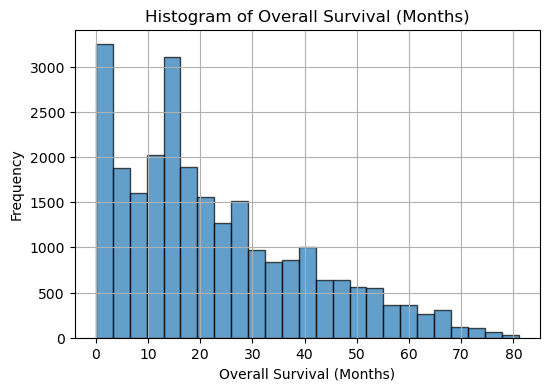

In [46]:
#plot the distribution:
plt.figure(figsize=(6, 4))  
plt.hist(df['Overall Survival (Months)'], bins=25, edgecolor='k', alpha=0.7)  
plt.title(f'Histogram of Overall Survival (Months)') 
plt.xlabel('Overall Survival (Months)') 
plt.ylabel('Frequency') 
plt.grid(True)
plt.show()  


In [47]:
#next convert to years as a new column Overall Survival (Years)

df['Overall Survival (Years)'] = df['Overall Survival (Months)'] / 12


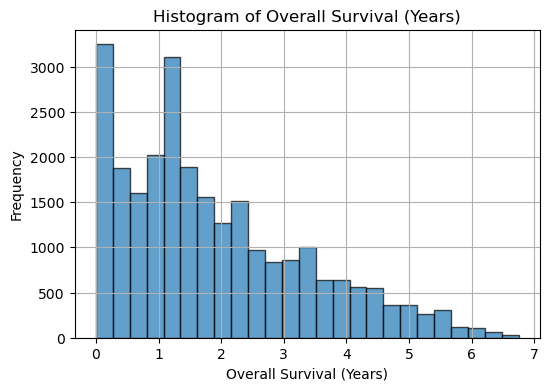

In [48]:
#plot the distribution - it should look the same as above as we only divided by 12.

#plot the distribution:
plt.figure(figsize=(6, 4))  
plt.hist(df['Overall Survival (Years)'], bins=25, edgecolor='k', alpha=0.7)  
plt.title(f'Histogram of Overall Survival (Years)') 
plt.xlabel('Overall Survival (Years)') 
plt.ylabel('Frequency') 
plt.grid(True)
plt.show()  

In [49]:
# set bins for the values of the years. 0-1, 1-2, 2-4 and >4
bins = [0, 1, 2, 4, float('inf')]

#label the groups: 
labels = ['0-1 years', '1-2 years', '2-4 years', '>4 years']

#create new Year Group in df - right= false means the grouping includes the left bin but not the right bin
df['Year Group'] = pd.cut(df['Overall Survival (Years)'], bins=bins, labels=labels, right=False)

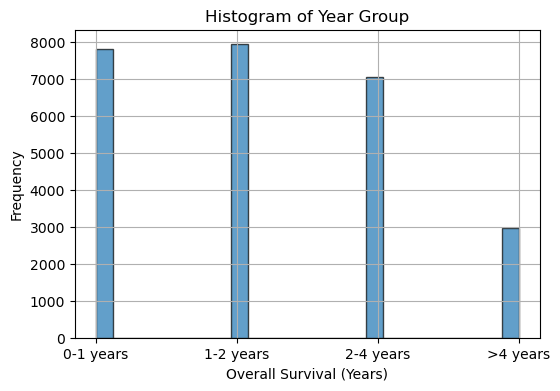

In [50]:
#plot the distribution - it should look the same as above as we only divided by 12.

#plot the distribution:
plt.figure(figsize=(6, 4))  
plt.hist(df['Year Group'], bins=25, edgecolor='k', alpha=0.7)  
plt.title(f'Histogram of Year Group') 
plt.xlabel('Overall Survival (Years)') 
plt.ylabel('Frequency') 
plt.grid(True)
plt.show()  

---

Next we will encode this target feature from categores to group numbers for modeling, we will then drop the original Months, Years and groups category so they are not present in the final data set for modeling:





In [51]:
df['Year Group Encoded'] = df['Year Group'].map({'0-1 years':1, '1-2 years':2, '2-4 years':3, '>4 years':4})

In [52]:
df.head()

,Age at Sequencing,Age at Surgical Procedure,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,Distant Mets: Bone,Distant Mets: Bowel,Distant Mets: Breast,Distant Mets: CNS/Brain,Distant Mets: Distant LN,Distant Mets: Female Genital,Distant Mets: Head and Neck,Distant Mets: Intra-Abdominal,Distant Mets: Kidney,Distant Mets: Liver,Distant Mets: Lung,Distant Mets: Male Genital,Distant Mets: Mediastinum,Distant Mets: Ovary,Distant Mets: Pleura,Distant Mets: PNS,Distant Mets: Skin,Distant Mets: Unspecified,Fraction Genome Altered,Metastatic patient,Met Count,Met Site Count,MSI Score,MSI Instable,Overall Survival (Months),Overall Survival Status: Living,Sample coverage,TMB (nonsynonymous),Tumor Purity,Average Age,Adenocarcinoma of the Gastroesophageal Junction,Adenoid Cystic Carcinoma,Anal Squamous Cell Carcinoma,Anorectal Mucosal Melanoma,Appendiceal Adenocarcinoma,Bladder Urothelial Carcinoma,Breast Invasive Ductal Carcinoma,Breast Invasive Lobular Carcinoma,Cervical Squamous Cell Carcinoma,Choriocarcinoma,Clear Cell Borderline Ovarian Tumor,Clear Cell Ovarian Cancer,Colon Adenocarcinoma,Colorectal Adenocarcinoma,Combined Small Cell Lung Carcinoma,Cutaneous Melanoma,Cutaneous Squamous Cell Carcinoma,Dedifferentiated Liposarcoma,Duodenal Adenocarcinoma,Embryonal Carcinoma,Esophageal Adenocarcinoma,Esophagogastric Adenocarcinoma,Extrahepatic Cholangiocarcinoma,"Gallbladder Adenocarcinoma, NOS",Gallbladder Cancer,Gastrointestinal Neuroendocrine Tumors,Gastrointestinal Stromal Tumor,Germ Cell Tumor with Somatic-Type Malignancy,Head and Neck Mucosal Melanoma,Head and Neck Squamous Cell Carcinoma,Head and Neck Squamous Cell Carcinoma of Unknown Primary,Hepatocellular Carcinoma,High-Grade Neuroendocrine Carcinoma of the Colon and Rectum,High-Grade Serous Ovarian Cancer,Hypopharynx Squamous Cell Carcinoma,Intrahepatic Cholangiocarcinoma,Large Cell Neuroendocrine Carcinoma,Larynx Squamous Cell Carcinoma,Leiomyosarcoma,Liposarcoma,Low-Grade Serous Ovarian Cancer,Lung Adenocarcinoma,Lung Neuroendocrine Tumor,Lung Squamous Cell Carcinoma,Melanoma of Unknown Primary,Mixed Germ Cell Tumor,Mucinous Adenocarcinoma of the Appendix,Mucosal Melanoma of the Esophagus,Mucosal Melanoma of the Urethra,Mucosal Melanoma of the Vulva/Vagina,Myxofibrosarcoma,Oral Cavity Squamous Cell Carcinoma,Oropharynx Squamous Cell Carcinoma,Pancreatic Adenocarcinoma,Pancreatic Neuroendocrine Tumor,Papillary Thyroid Cancer,Pleural Mesothelioma,"Pleural Mesothelioma, Biphasic Type","Pleural Mesothelioma, Epithelioid Type","Pleural Mesothelioma, Sarcomatoid Type",Poorly Differentiated Thyroid Cancer,Prostate Adenocarcinoma,Rectal Adenocarcinoma,Renal Clear Cell Carcinoma,Seminoma,Sinonasal Squamous Cell Carcinoma,Small Bowel Cancer,Small Bowel Well-Differentiated Neuroendocrine Tumor,Small Cell Lung Cancer,Small Intestinal Carcinoma,Stomach Adenocarcinoma,Teratoma,Undifferentiated Pleomorphic Sarcoma/Malignant Fibrous Histiocytoma/High-Grade Spindle Cell Sarcoma,Upper Tract Urothelial Carcinoma,Uterine Carcinosarcoma/Uterine Malignant Mixed Mullerian Tumor,Uterine Endometrioid Carcinoma,Uterine Leiomyosarcoma,Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma,Uveal Melanoma,Well-Differentiated Liposarcoma,Well-Differentiated Neuroendocrine Tumor of the Appendix,Well-Differentiated Neuroendocrine Tumor of the Rectum,Well-Differentiated Neuroendocrine Tumors of the Stomach,Yolk Sac Tumor,Overall Survival (Years),Year Group,Year Group Encoded
Sample ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P-0000004-T01-IM3,39.74,37.03,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.2782,1,2,2,2.50,0,4,0,428,4.436621,50.0,39.1225,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.333333,0-1 years,1
P-0000015-T01-IM3,44.44,44.42,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0

In [53]:
#lets see how our target looks:
df['Year Group Encoded'].value_counts().sort_index()

Year Group Encoded
1    7824
2    7938
3    7052
4    2957
Name: count, dtype: int64

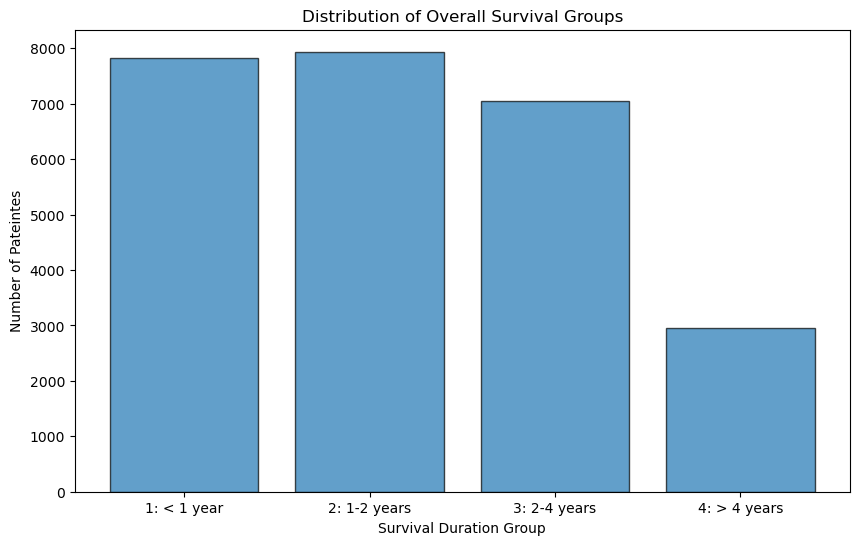

In [54]:
#check out target feature:

group_values = df['Year Group Encoded'].value_counts().sort_index()

#visualize
plt.figure(figsize=(10, 6))  
plt.bar(group_values.index, group_values.values, edgecolor='k', alpha=0.7) 
plt.title(f'Distribution of Overall Survival Groups') 
plt.xlabel('Survival Duration Group')
plt.xticks(group_values.index, ['1: < 1 year', '2: 1-2 years', '3: 2-4 years', '4: > 4 years'])
plt.ylabel('Number of Pateintes')
plt.show()  

**Observations:**

As we can see there is a class imbalance for group 4 > 4years survival. This is common as patients with this advanced stage of disease where they have metastasic cancer usually do not have good prognosis.

In [55]:
#drop the original Overall Survival(Months), Overall Survival (Years), Year Group features:

cols_to_drop = ['Overall Survival (Months)', 'Overall Survival (Years)', 'Year Group']

In [56]:
# drop the columns
df = df.drop(columns = cols_to_drop)

In [57]:
#sanity check
df.head()

,Age at Sequencing,Age at Surgical Procedure,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,Distant Mets: Bone,Distant Mets: Bowel,Distant Mets: Breast,Distant Mets: CNS/Brain,Distant Mets: Distant LN,Distant Mets: Female Genital,Distant Mets: Head and Neck,Distant Mets: Intra-Abdominal,Distant Mets: Kidney,Distant Mets: Liver,Distant Mets: Lung,Distant Mets: Male Genital,Distant Mets: Mediastinum,Distant Mets: Ovary,Distant Mets: Pleura,Distant Mets: PNS,Distant Mets: Skin,Distant Mets: Unspecified,Fraction Genome Altered,Metastatic patient,Met Count,Met Site Count,MSI Score,MSI Instable,Overall Survival Status: Living,Sample coverage,TMB (nonsynonymous),Tumor Purity,Average Age,Adenocarcinoma of the Gastroesophageal Junction,Adenoid Cystic Carcinoma,Anal Squamous Cell Carcinoma,Anorectal Mucosal Melanoma,Appendiceal Adenocarcinoma,Bladder Urothelial Carcinoma,Breast Invasive Ductal Carcinoma,Breast Invasive Lobular Carcinoma,Cervical Squamous Cell Carcinoma,Choriocarcinoma,Clear Cell Borderline Ovarian Tumor,Clear Cell Ovarian Cancer,Colon Adenocarcinoma,Colorectal Adenocarcinoma,Combined Small Cell Lung Carcinoma,Cutaneous Melanoma,Cutaneous Squamous Cell Carcinoma,Dedifferentiated Liposarcoma,Duodenal Adenocarcinoma,Embryonal Carcinoma,Esophageal Adenocarcinoma,Esophagogastric Adenocarcinoma,Extrahepatic Cholangiocarcinoma,"Gallbladder Adenocarcinoma, NOS",Gallbladder Cancer,Gastrointestinal Neuroendocrine Tumors,Gastrointestinal Stromal Tumor,Germ Cell Tumor with Somatic-Type Malignancy,Head and Neck Mucosal Melanoma,Head and Neck Squamous Cell Carcinoma,Head and Neck Squamous Cell Carcinoma of Unknown Primary,Hepatocellular Carcinoma,High-Grade Neuroendocrine Carcinoma of the Colon and Rectum,High-Grade Serous Ovarian Cancer,Hypopharynx Squamous Cell Carcinoma,Intrahepatic Cholangiocarcinoma,Large Cell Neuroendocrine Carcinoma,Larynx Squamous Cell Carcinoma,Leiomyosarcoma,Liposarcoma,Low-Grade Serous Ovarian Cancer,Lung Adenocarcinoma,Lung Neuroendocrine Tumor,Lung Squamous Cell Carcinoma,Melanoma of Unknown Primary,Mixed Germ Cell Tumor,Mucinous Adenocarcinoma of the Appendix,Mucosal Melanoma of the Esophagus,Mucosal Melanoma of the Urethra,Mucosal Melanoma of the Vulva/Vagina,Myxofibrosarcoma,Oral Cavity Squamous Cell Carcinoma,Oropharynx Squamous Cell Carcinoma,Pancreatic Adenocarcinoma,Pancreatic Neuroendocrine Tumor,Papillary Thyroid Cancer,Pleural Mesothelioma,"Pleural Mesothelioma, Biphasic Type","Pleural Mesothelioma, Epithelioid Type","Pleural Mesothelioma, Sarcomatoid Type",Poorly Differentiated Thyroid Cancer,Prostate Adenocarcinoma,Rectal Adenocarcinoma,Renal Clear Cell Carcinoma,Seminoma,Sinonasal Squamous Cell Carcinoma,Small Bowel Cancer,Small Bowel Well-Differentiated Neuroendocrine Tumor,Small Cell Lung Cancer,Small Intestinal Carcinoma,Stomach Adenocarcinoma,Teratoma,Undifferentiated Pleomorphic Sarcoma/Malignant Fibrous Histiocytoma/High-Grade Spindle Cell Sarcoma,Upper Tract Urothelial Carcinoma,Uterine Carcinosarcoma/Uterine Malignant Mixed Mullerian Tumor,Uterine Endometrioid Carcinoma,Uterine Leiomyosarcoma,Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma,Uveal Melanoma,Well-Differentiated Liposarcoma,Well-Differentiated Neuroendocrine Tumor of the Appendix,Well-Differentiated Neuroendocrine Tumor of the Rectum,Well-Differentiated Neuroendocrine Tumors of the Stomach,Yolk Sac Tumor,Year Group Encoded
Sample ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P-0000004-T01-IM3,39.74,37.03,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.2782,1,2,2,2.50,0,0,428,4.436621,50.0,39.1225,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
P-0000015-T01-IM3,44.44,44.42,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0.3503,1,8,8,2.55,0,0,281,7.764087,40.0,44.6775,0,0,0,0,0,0,1,0,0,0,0,0,0

## Baseline Modelling:<a class="anchor" id="model"></a>

Now we can start doing some classification modelling to see how our baseline models performs.

We will try:

- `Multi Class Logistic Regression`
- `KNN`
- `SVM`
- `Decision Tree`

### Train Test Split

In [58]:
# train test split

#set X and y:

X = df.drop(columns=['Year Group Encoded'])
y = df['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')


Shape of: X_train_full:(20616, 118), X_train:(16492, 118), X_val:(4124, 118), X_test:(5155, 118)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


Before proceeding with modeling, we will scale our data using Standard Scaler

### Scaling the data

In [59]:
#instantiate the scaler
scaler = StandardScaler()

#fit scaler to train data
scaler.fit(X_train_full)

#transform train and test dataframes
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_train_full_scaled = scaler.transform(X_train_full)
X_test_scaled = scaler.transform(X_test)


### Multi Class Logistic Regression

In [60]:
# Let's try a modest range of C values to try and optimize the logreg model:

c_values = [0.000001, .00001, .0001, .001, .01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]

# Set up empty lists to store the accuracies
scaled_train_accuracies = []
scaled_validation_accuracies = []

# Iterate over the C values
for c in c_values:
    
    # Instantiate a log reg and fit to the train set
    scaled_logreg = LogisticRegression(C=c, random_state=42).fit(X_train_scaled, y_train)
    
    # Score on the train set and append this accuracy to its respective list
    scaled_train_accuracies.append(scaled_logreg.score(X_train_scaled, y_train))
    
    # Score on the validation set and append this accuracy to its respective list
    scaled_validation_accuracies.append(scaled_logreg.score(X_val_scaled, y_val))

print(f'Max Training Accuracy: {max(scaled_train_accuracies)}')
print(f'Max Validation Accuracy: {max(scaled_validation_accuracies)}, at C Value: {c_values[scaled_validation_accuracies.index(max(scaled_validation_accuracies))]}')

Max Training Accuracy: 0.5861629881154499
Max Validation Accuracy: 0.5720174587778856, at C Value: 10000


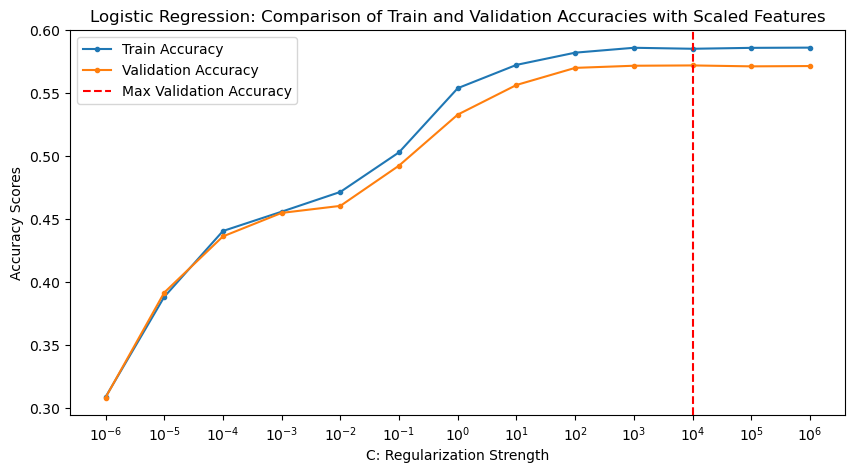

In [61]:
#plot the train and test accuracies for a visual of the best hyperparameter to use moving forward

plt.figure(figsize=(10,5))

# plot the train and test accuracies separate
plt.plot(c_values, scaled_train_accuracies,label="Train Accuracy",marker='.')
plt.plot(c_values, scaled_validation_accuracies,label="Validation Accuracy",marker='.')

# make the scale more interpretable
plt.title('Logistic Regression: Comparison of Train and Validation Accuracies with Scaled Features')
plt.xscale('log')
plt.xlabel('C: Regularization Strength')
plt.xticks(c_values)
plt.ylabel('Accuracy Scores')

# Find the C value for max test accuracy
max_val_score_index = scaled_validation_accuracies.index(max(scaled_validation_accuracies))
C_value_max_val = c_values[max_val_score_index]

# Add a vertical line at max test accuracy
plt.axvline(x=C_value_max_val, color='r', linestyle='--', label='Max Validation Accuracy')

plt.legend()
plt.show()

---
Lets try a different regularization penalty (l1 = lasso) and different solver (saga) for the scaled data


In [62]:
# Let's try a modest range of C values to try and optimize the logreg model:

c_values = [0.000001, .00001, .0001, .001, .01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]

# Set up empty lists to store the accuracies
train_accuracies = []
validation_accuracies = []

# Iterate over the C values
for c in c_values:
    
    # Instantiate a log reg and fit to the train set
    logreg_l1 = LogisticRegression(C=c, solver='saga', penalty = 'l1', random_state=42).fit(X_train_scaled, y_train)
    
    # Score on the train set and append this accuracy to its respective list
    train_accuracies.append(logreg_l1.score(X_train_scaled, y_train))
    
    # Score on the validation set and append this accuracy to its respective list
    validation_accuracies.append(logreg_l1.score(X_val_scaled, y_val))

print(f'Max Training Accuracy: {max(train_accuracies)}, at C Value: {c_values[train_accuracies.index(max(train_accuracies))]}')
print(f'Max Validation Accuracy: {max(validation_accuracies)}, at C Value: {c_values[validation_accuracies.index(max(validation_accuracies))]}')

Max Training Accuracy: 0.4733810332282319, at C Value: 1
Max Validation Accuracy: 0.46435499515033946, at C Value: 1


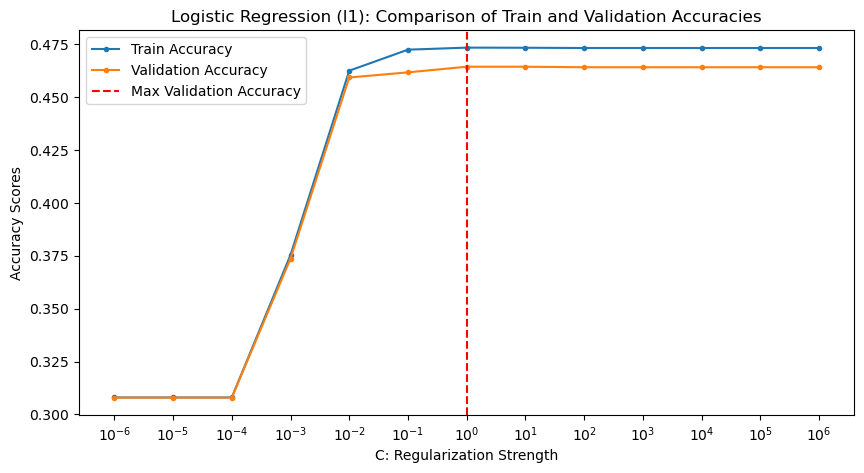

In [63]:
#plot the train and test accuracies for a visual of the best hyperparameter to use moving forward

plt.figure(figsize=(10,5))

# plot the train and test accuracies separate
plt.plot(c_values, train_accuracies,label="Train Accuracy",marker='.')
plt.plot(c_values, validation_accuracies,label="Validation Accuracy",marker='.')

# make the scale more interpretable
plt.title('Logistic Regression (l1): Comparison of Train and Validation Accuracies')
plt.xscale('log')
plt.xlabel('C: Regularization Strength')
plt.xticks(c_values)
plt.ylabel('Accuracy Scores')

# Find the C value for max test accuracy
max_val_score_index = validation_accuracies.index(max(validation_accuracies))
C_value_val_test = c_values[max_val_score_index]

# Add a vertical line at max test accuracy
plt.axvline(x=C_value_val_test, color='r', linestyle='--', label='Max Validation Accuracy')

plt.legend()
plt.show()

---

Next I want to try Log regression from Stats Model to see the p-values to determine if there are any features that are not significant in predicting the Year Group.

In [64]:
#convert X_train scaled to a df

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns).set_index(X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns).set_index(X_test.index)
X_train_full_scaled = pd.DataFrame(X_train_full_scaled, columns=X_train_full.columns).set_index(X_train_full.index)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns).set_index(X_val.index)

In [65]:
import statsmodels.api as sm

# Add a constant to the X
X_train_with_const = sm.add_constant(X_train_scaled_df)

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit()

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: nan
         Iterations 27
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16138
Method:                           MLE   Df Model:                          351
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                     nan
Time:                        20:13:36   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                       nan
                                                                               Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

This model did not work as we are getting NaN for all the values. This is likely due to the dummy variable trap. I did not need to drop one of the dummy variables when modeling with SKLearn but with statsmodels, it is important so I will choose one of the OHE columns to drop. To confirm this assumption, I will look ip the variance inflation factors and see if any have an inf value for VIF. The higher the VIF, the less variance that can be explained by my features. If there is no variance, the features can not predict y and the model can not run.

In [66]:
#all values came up as Nan Lets see what is going on here:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_train_with_const is a pandas DataFrame
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_with_const.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(len(X_train_with_const.columns))]

print(vif_data)


                                               feature         VIF
0                                                const    1.001509
1                                    Age at Sequencing  189.355934
2                            Age at Surgical Procedure  101.894263
3                          Distant Mets: Adrenal Gland         inf
4                          Distant Mets: Biliary tract         inf
5                             Distant Mets: Bladder/UT         inf
6                                   Distant Mets: Bone         inf
7                                  Distant Mets: Bowel         inf
8                                 Distant Mets: Breast         inf
9                              Distant Mets: CNS/Brain         inf
10                            Distant Mets: Distant LN         inf
11                        Distant Mets: Female Genital         inf
12                         Distant Mets: Head and Neck         inf
13                       Distant Mets: Intra-Abdominal        

As we can see above, my assumption was correct. My OHE features have a VIF of inf. This is the dummy variable trap and we can solve this by dropping one of the features. To start we will drop the feature with the lowest number of entries: `Clear Cell Borderline Ovarian Tumor`. We will see how this affects the model and if we need to drop a different feature with more entries.


In [67]:
#set new X and y dropping the dummy variable as explained above and the target variable in X
X = df.drop(columns=['Year Group Encoded', 'Clear Cell Borderline Ovarian Tumor'])

#set the y to be the target                
y = df['Year Group Encoded']

In [68]:
# redo the train/test split

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')



Shape of: X_train_full:(20616, 117), X_train:(16492, 117), X_val:(4124, 117), X_test:(5155, 117)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [69]:
#reperform the scaling:

#instantiate the scaler
scaler = StandardScaler()

#fit scaler to train data
scaler.fit(X_train_full)

#transform train and test dataframes
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_train_full_scaled = scaler.transform(X_train_full)
X_test_scaled = scaler.transform(X_test)

In [70]:
#convert X_*_scaled to df

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns).set_index(X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns).set_index(X_test.index)
X_train_full_scaled = pd.DataFrame(X_train_full_scaled, columns=X_train_full.columns).set_index(X_train_full.index)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns).set_index(X_val.index)

In [71]:
#add constant to X_train_scaled
X_train_with_const = sm.add_constant(X_train_scaled_df)

In [72]:
#recheck the VIF make sure none are inf

# Assuming X_train_with_const is a pandas DataFrame
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_with_const.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(len(X_train_with_const.columns))]

print(vif_data)

                                               feature          VIF
0                                                const     1.001509
1                                    Age at Sequencing   189.355934
2                            Age at Surgical Procedure   101.894263
3                          Distant Mets: Adrenal Gland          inf
4                          Distant Mets: Biliary tract          inf
5                             Distant Mets: Bladder/UT          inf
6                                   Distant Mets: Bone          inf
7                                  Distant Mets: Bowel          inf
8                                 Distant Mets: Breast          inf
9                              Distant Mets: CNS/Brain          inf
10                            Distant Mets: Distant LN          inf
11                        Distant Mets: Female Genital          inf
12                         Distant Mets: Head and Neck          inf
13                       Distant Mets: Intra-Abd

**Observations**:

---
We can see from above, that some of the VIF score int he OHE columns are still quite high so we will put back the one we dropped and drop one that has more entires `Cutaneous Melanoma`. Also, we can see that the `Distant Met` columns are now at a VIF of inf. We will also choose to drop one of these as well:  `Distant Mets: Unspecified`

In [73]:
#set new X and y dropping the dummy variable as explained above and the target variable in X
X = df.drop(columns=['Year Group Encoded', 'Cutaneous Melanoma', 'Distant Mets: Unspecified'])

#set the y to be the target                
y = df['Year Group Encoded']

In [74]:
# redo the train/test split

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')


Shape of: X_train_full:(20616, 116), X_train:(16492, 116), X_val:(4124, 116), X_test:(5155, 116)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [81]:
#reperform the scaling:

#instantiate the scaler
scaler = StandardScaler()

#fit scaler to train data
scaler.fit(X_train_full)

#transform train and test dataframes
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_train_full_scaled = scaler.transform(X_train_full)
X_test_scaled = scaler.transform(X_test)

In [82]:
#convert X_*_scaled to df

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns).set_index(X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns).set_index(X_test.index)
X_train_full_scaled = pd.DataFrame(X_train_full_scaled, columns=X_train_full.columns).set_index(X_train_full.index)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns).set_index(X_val.index)

In [83]:
#add constant to X_train_scaled
X_train_with_const = sm.add_constant(X_train_scaled_df)

In [72]:
#recheck the VIF make sure none are inf

# Assuming X_train_with_const is a pandas DataFrame
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_with_const.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(len(X_train_with_const.columns))]

print(vif_data)

                                               feature         VIF
0                                                const    1.001509
1                                    Age at Sequencing  189.355934
2                            Age at Surgical Procedure  101.894263
3                          Distant Mets: Adrenal Gland    1.701982
4                          Distant Mets: Biliary tract    2.144296
5                             Distant Mets: Bladder/UT    1.899717
6                                   Distant Mets: Bone    3.004747
7                                  Distant Mets: Bowel    2.509701
8                                 Distant Mets: Breast    1.168496
9                              Distant Mets: CNS/Brain    2.063148
10                            Distant Mets: Distant LN    2.733147
11                        Distant Mets: Female Genital    2.643161
12                         Distant Mets: Head and Neck    1.273621
13                       Distant Mets: Intra-Abdominal    3.34

**Observations**:

---
As we can see now, that helped to bring the VIFs way down and none are inf anymore. There are a few that are still high but the rest have come right down below 10. Let try viewing our p-values again with the statsmodel multiclass log regression to see what we can find about the current features.

In [84]:
import statsmodels.api as sm

# Fit the multinomial logistic regression model
mnlogit_model = sm.MNLogit(y_train, X_train_with_const)
mnlogit_result = mnlogit_model.fit(max_iter=10000)

# Get the summary of the regression
print(mnlogit_result.summary())

Optimization terminated successfully.
         Current function value: nan
         Iterations 26
                          MNLogit Regression Results                          
Dep. Variable:     Year Group Encoded   No. Observations:                16492
Model:                        MNLogit   Df Residuals:                    16141
Method:                           MLE   Df Model:                          348
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                     nan
Time:                        20:18:15   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -21897.
Covariance Type:            nonrobust   LLR p-value:                       nan
                                                                               Year Group Encoded=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [79]:
correlation_matrix = X.corr()

correlation_matrix

,Age at Sequencing,Age at Surgical Procedure,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,Distant Mets: Bone,Distant Mets: Bowel,Distant Mets: Breast,Distant Mets: CNS/Brain,Distant Mets: Distant LN,Distant Mets: Female Genital,Distant Mets: Head and Neck,Distant Mets: Intra-Abdominal,Distant Mets: Kidney,Distant Mets: Liver,Distant Mets: Lung,Distant Mets: Male Genital,Distant Mets: Mediastinum,Distant Mets: Ovary,Distant Mets: Pleura,Distant Mets: PNS,Distant Mets: Skin,Fraction Genome Altered,Metastatic patient,Met Count,Met Site Count,MSI Score,MSI Instable,Overall Survival Status: Living,Sample coverage,TMB (nonsynonymous),Tumor Purity,Average Age,Adenocarcinoma of the Gastroesophageal Junction,Adenoid Cystic Carcinoma,Anal Squamous Cell Carcinoma,Anorectal Mucosal Melanoma,Appendiceal Adenocarcinoma,Bladder Urothelial Carcinoma,Breast Invasive Ductal Carcinoma,Breast Invasive Lobular Carcinoma,Cervical Squamous Cell Carcinoma,Choriocarcinoma,Clear Cell Borderline Ovarian Tumor,Clear Cell Ovarian Cancer,Colon Adenocarcinoma,Colorectal Adenocarcinoma,Combined Small Cell Lung Carcinoma,Cutaneous Squamous Cell Carcinoma,Dedifferentiated Liposarcoma,Duodenal Adenocarcinoma,Embryonal Carcinoma,Esophageal Adenocarcinoma,Esophagogastric Adenocarcinoma,Extrahepatic Cholangiocarcinoma,"Gallbladder Adenocarcinoma, NOS",Gallbladder Cancer,Gastrointestinal Neuroendocrine Tumors,Gastrointestinal Stromal Tumor,Germ Cell Tumor with Somatic-Type Malignancy,Head and Neck Mucosal Melanoma,Head and Neck Squamous Cell Carcinoma,Head and Neck Squamous Cell Carcinoma of Unknown Primary,Hepatocellular Carcinoma,High-Grade Neuroendocrine Carcinoma of the Colon and Rectum,High-Grade Serous Ovarian Cancer,Hypopharynx Squamous Cell Carcinoma,Intrahepatic Cholangiocarcinoma,Large Cell Neuroendocrine Carcinoma,Larynx Squamous Cell Carcinoma,Leiomyosarcoma,Liposarcoma,Low-Grade Serous Ovarian Cancer,Lung Adenocarcinoma,Lung Neuroendocrine Tumor,Lung Squamous Cell Carcinoma,Melanoma of Unknown Primary,Mixed Germ Cell Tumor,Mucinous Adenocarcinoma of the Appendix,Mucosal Melanoma of the Esophagus,Mucosal Melanoma of the Urethra,Mucosal Melanoma of the Vulva/Vagina,Myxofibrosarcoma,Oral Cavity Squamous Cell Carcinoma,Oropharynx Squamous Cell Carcinoma,Pancreatic Adenocarcinoma,Pancreatic Neuroendocrine Tumor,Papillary Thyroid Cancer,Pleural Mesothelioma,"Pleural Mesothelioma, Biphasic Type","Pleural Mesothelioma, Epithelioid Type","Pleural Mesothelioma, Sarcomatoid Type",Poorly Differentiated Thyroid Cancer,Prostate Adenocarcinoma,Rectal Adenocarcinoma,Renal Clear Cell Carcinoma,Seminoma,Sinonasal Squamous Cell Carcinoma,Small Bowel Cancer,Small Bowel Well-Differentiated Neuroendocrine Tumor,Small Cell Lung Cancer,Small Intestinal Carcinoma,Stomach Adenocarcinoma,Teratoma,Undifferentiated Pleomorphic Sarcoma/Malignant Fibrous Histiocytoma/High-Grade Spindle Cell Sarcoma,Upper Tract Urothelial Carcinoma,Uterine Carcinosarcoma/Uterine Malignant Mixed Mullerian Tumor,Uterine Endometrioid Carcinoma,Uterine Leiomyosarcoma,Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma,Uveal Melanoma,Well-Differentiated Liposarcoma,Well-Differentiated Neuroendocrine Tumor of the Appendix,Well-Differentiated Neuroendocrine Tumor of the Rectum,Well-Differentiated Neuroendocrine Tumors of the Stomach,Yolk Sac Tumor
Age at Sequencing,1.000000,0.990176,-0.008945,-0.016103,0.012141,0.001172,-0.014867,-0.030979,-0.034385,-0.050905,-0.019734,-0.009365,-0.071602,-0.029847,-0.090044,-0.024714,-0.002409,-0.009706,-0.075117,0.023752,-0.015659,-0.034914,-0.013897,-0.004222,-0.072582,-0.069910,0.006366,0.010793,-0.088170,-0.027257,0.036869,-0.039718,0.996845,0.000088,-0.040371,-0.003043,0.004659,-0.016944,0.080373,-0.156882,-0.014900,-0.054545,-0.041452,0.002007,-0.036991,-0.107943,-0.064750,0.007220,0.035300,-0.000866,-0.002812,-0.083426,-0.003109,-0.007147,0.005629,0.004933,0.012398,0.007307,-0.029975,-0.040705,0.015680,0.004466,-0.000209,0

In [ ]:
#to do: figure out why this MNLogit model is producing null results

---
As seen from above, there is a bug that I need more time to debug and figure out. For now, we will try refitting the sklearn logistic regression minus those features with inf VIF scores and see how the test performs. I will then move on to fitting the other models as explained above. This could be due to multicolinearity in some features however, dropping the features that exhibit multicolinearity and fitting the above MNLog Regression did not solve the issue.

---

Refit sklearn Logistic Regression

In [85]:
# Let's try a modest range of C values to try and optimize the logreg model:

c_values = [0.000001, .00001, .0001, .001, .01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]

# Set up empty lists to store the accuracies
scaled_train_accuracies = []
scaled_validation_accuracies = []

# Iterate over the C values
for c in c_values:
    
    # Instantiate a log reg and fit to the train set
    scaled_logreg = LogisticRegression(C=c, random_state=42).fit(X_train_scaled, y_train)
    
    # Score on the train set and append this accuracy to its respective list
    scaled_train_accuracies.append(scaled_logreg.score(X_train_scaled, y_train))
    
    # Score on the validation set and append this accuracy to its respective list
    scaled_validation_accuracies.append(scaled_logreg.score(X_val_scaled, y_val))

print(f'Max Training Accuracy: {max(scaled_train_accuracies)}')
print(f'Max Validation Accuracy: {max(scaled_validation_accuracies)}, at C Value: {c_values[scaled_validation_accuracies.index(max(scaled_validation_accuracies))]}')

Max Training Accuracy: 0.581675964103808
Max Validation Accuracy: 0.5710475266731329, at C Value: 100


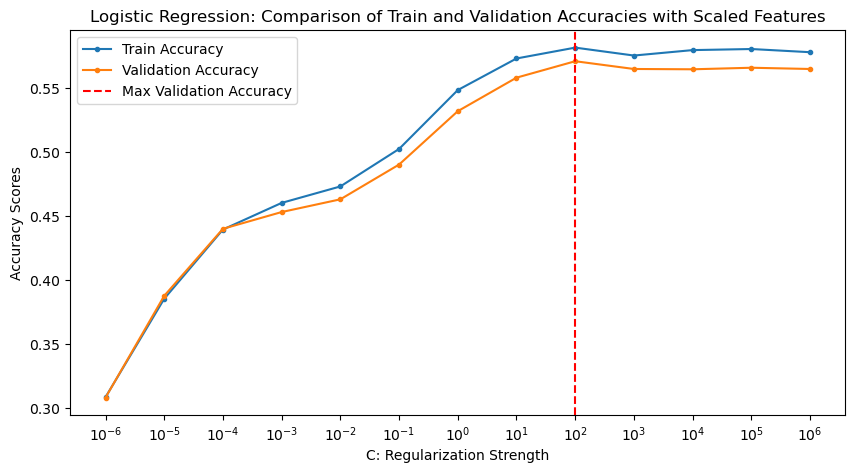

In [86]:
#plot the train and test accuracies for a visual of the best hyperparameter to use moving forward

plt.figure(figsize=(10,5))

# plot the train and test accuracies separate
plt.plot(c_values, scaled_train_accuracies,label="Train Accuracy",marker='.')
plt.plot(c_values, scaled_validation_accuracies,label="Validation Accuracy",marker='.')

# make the scale more interpretable
plt.title('Logistic Regression: Comparison of Train and Validation Accuracies with Scaled Features')
plt.xscale('log')
plt.xlabel('C: Regularization Strength')
plt.xticks(c_values)
plt.ylabel('Accuracy Scores')

# Find the C value for max val accuracy
max_val_score_index = scaled_validation_accuracies.index(max(scaled_validation_accuracies))
C_value_max_val = c_values[max_val_score_index]

# Add a vertical line at max val accuracy
plt.axvline(x=C_value_max_val, color='r', linestyle='--', label='Max Validation Accuracy')

plt.legend()
plt.show()

**Observations**: 

---

This model is doing slightly worse, so we will stick with the features in the first sklearn model. Lets refit this now with the optimized C value of 10000

In [87]:
# We need to do the original train test split

#set X and y:

X = df.drop(columns=['Year Group Encoded'])
y = df['Year Group Encoded']

# train/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#split off a validation set for hyperparameter tuning from X_train_full and y_train_full
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

#sanity check to make sure all shapes match
print(f'Shape of: X_train_full:{X_train_full.shape}, X_train:{X_train.shape}, X_val:{X_val.shape}, X_test:{X_test.shape}')

#sanity check to make sure all shapes match
print(f'Shape of: y_train_full:{y_train_full.shape}, y_train:{y_train.shape}, y_val:{y_val.shape}, y_test:{y_test.shape}')


Shape of: X_train_full:(20616, 118), X_train:(16492, 118), X_val:(4124, 118), X_test:(5155, 118)
Shape of: y_train_full:(20616,), y_train:(16492,), y_val:(4124,), y_test:(5155,)


In [88]:
#instantiate the scaler
scaler = StandardScaler()

#fit scaler to train data
scaler.fit(X_train_full)

#transform train and test dataframes
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_train_full_scaled = scaler.transform(X_train_full)
X_test_scaled = scaler.transform(X_test)


In [89]:
#instantiate and fit the model on the scaled full train data:

baseline_logreg = LogisticRegression(C=10000, random_state=42).fit(X_train_full_scaled, y_train_full)
    
# Score on the full train set 
print(f' Baseline Logistic Regression train score:{baseline_logreg.score(X_train_full_scaled, y_train_full)}')
    
# Score on the test set 
print(f' Baseline Logistic Regression test score:{baseline_logreg.score(X_test_scaled, y_test)}')

 Baseline Logistic Regression train score:0.5782887077997672
 Baseline Logistic Regression test score:0.5598448108632396


**Baseline Logistic Regression Conclusions:**

---
As we can see we have a train score of ~0.58 and a test score of ~0.56.  Based on this, this model is not overfitting which is a good sign. This is better than random guessing the category at each patient belongs to at 25%. We will need to go back to feature engineering/selection to try and increase this models performance. 

In [92]:
#lets check the metrics classification report to see how the other metrics performed:

#import necessary libraries:
from sklearn.metrics import classification_report

#get the predicted values
y_pred = baseline_logreg.predict(X_test_scaled)

#create the metrics report
report_baseline_logreg = classification_report(y_test, y_pred)

print(report_baseline_logreg)

              precision    recall  f1-score   support

           1       0.60      0.62      0.61      1565
           2       0.51      0.53      0.52      1588
           3       0.57      0.60      0.58      1411
           4       0.62      0.37      0.47       591

    accuracy                           0.56      5155
   macro avg       0.57      0.53      0.54      5155
weighted avg       0.56      0.56      0.56      5155



**Observations**: 

---

As we can see from the classification report, precision, recall and f1 are all around the same for groups 1, 2, 3. There is a lower f1 and recall for gorup 4. This could be due to the class imbalance of group 4 as seen above. For further hyperparameter tuning, it may be worth looking into an upsampling/balancing technique such as SMOTE to see if this improves the metrics of the model.

In [ ]:
#Todo: run smote and refit model and check metrics

---
As I will be running various models, lets save the train and val/test scores in a list to keep track of them all and for easier comparison later on. I will define a function add_scores that allows for adding of scores to a a defined list.

---

In [93]:
def add_scores(name, model, train_score, test_score, results_list, precision=2):
    '''
    Description of function:
    ------------------------
    Add the results of a machine learning model to a results list.

    This function takes the name of the model, its performance scores on the training and test sets,
    and appends a dictionary of these results to a specified list. The scores can be rounded to a specified
    precision.

    Parameters:
    ----------
    name (str): The name of the machine learning model
    model(str): Id of the model for future recall
    train_score (float): The performance score of the model on the training set.
    test_score (float): The performance score of the model on the test set.
    results_list (list): The list to which the results dictionary will be appended.
    precision (int, optional): The number of decimal places to round the scores to. Defaults to 2.

    Returns:
    --------
    None: This function does not return a value. It modifies the results_list specified, in place.

    Example:
    --------
    >>> scores_list = []
    >>> add_scores('Logistic Regression', 'my_logreg_final', 0.7257083998664593, 0.7290993788819876, scores_list, 3)
    >>> scores_list
    [{'Name': 'Logistic Regression', 'Model': 'my_logreg_final', 'Train Score': 0.726, 'Test Score': 0.729}]

    '''
    results = {'Name': name,
               'Model':model,
               'Train Score': round(train_score, precision),
               'Test Score': round(test_score, precision)
              }
    results_list.append(results)

In [98]:
#instantiate empty scores list
scores_list = []

In [99]:
#add scores to scores list
add_scores('Logistic Regression Baseline', 'baseline_logreg', 
           baseline_logreg.score(X_train_full_scaled, y_train_full), baseline_logreg.score(X_test_scaled, y_test),scores_list, 8)

In [100]:
#sanity check:
scores_list

[{'Name': 'Logistic Regression Baseline',
  'Model': 'baseline_logreg',
  'Train Score': 0.57828871,
  'Test Score': 0.55984481}]

### KNN model

---

Next we will run a baseline KNN model to see how it fairs with the data. We will use the same data set as the baseline logreg model for proper comparisons. We will perform some slight hyperparameter tuning, varying the number of neighbors to see which is best.

In [101]:
#import necessary libraries
from sklearn.neighbors import KNeighborsClassifier

#set a range for number of neighbors
neighbors = range(1, X_train_scaled.shape[1], 2)

#instantiate empty lists to hold the scores
train_acc = []
val_acc = []

#make a forloop to test a variety of number of neighbors

for n in neighbors: 
    
    #Instantiate the model & fit it to our data
    KNN_model = KNeighborsClassifier(n_neighbors=n)
    KNN_model.fit(X_train_scaled, y_train)
    
    #Score the model on the val set
    train_accuracy = KNN_model.score(X_train_scaled, y_train)
    val_accuracy = KNN_model.score(X_val_scaled, y_val)
    
    train_acc.append(train_accuracy)
    val_acc.append(val_accuracy)

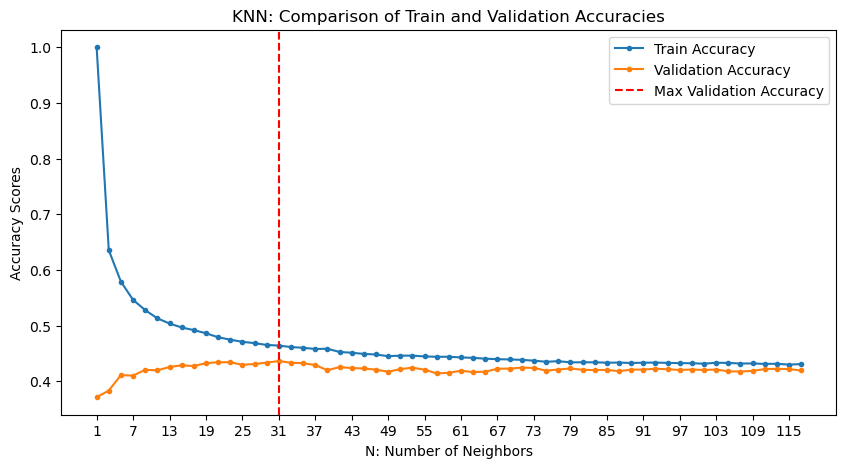

In [108]:
#plot the train and test accuracies for a visual of the best number of neighbors to use moving forward

plt.figure(figsize=(10,5))

# plot the train and val accuracies separate
plt.plot(neighbors, train_acc,label="Train Accuracy",marker='.')
plt.plot(neighbors, val_acc,label="Validation Accuracy",marker='.')

# plot titles and scales
plt.title('KNN: Comparison of Train and Validation Accuracies')
plt.xlabel('N: Number of Neighbors')
plt.xticks(neighbors[::3])
plt.ylabel('Accuracy Scores')

# Find the number of neighbors value for max val accuracy
max_val_score_index = val_acc.index(max(val_acc))
n_value_val_test = neighbors[max_val_score_index]

# Add a vertical line at max val accuracy
plt.axvline(x=n_value_val_test, color='r', linestyle='--', label='Max Validation Accuracy')

plt.legend()
plt.show()

In [115]:
#find the best train and val accuracies
print(f'Max Training Accuracy at Max Validation Accuracy: {train_acc[val_acc.index(max(val_acc))]}')
print(f'Max Validation Accuracy: {max(val_acc)}, at Number of neighbors: {neighbors[val_acc.index(max(val_acc))]}')

Max Training Accuracy at Max Validation Accuracy: 0.4642250788260975
Max Validation Accuracy: 0.4364694471387003, at Number of neighbors: 31


---
Next lets fit the optimized model of n_neighbors=31 to our full train and test data.

In [116]:
#instantiate the model
baseline_KNN = KNeighborsClassifier(n_neighbors=31)

#fit the model
baseline_KNN.fit(X_train_full_scaled, y_train_full)


KNeighborsClassifier(n_neighbors=31)

In [117]:
# Score on the full train set 
print(f' Baseline KNN train score:{baseline_KNN.score(X_train_full_scaled, y_train_full)}')
    
# Score on the test set 
print(f' Baseline KNN test score:{baseline_KNN.score(X_test_scaled, y_test)}')

 Baseline KNN train score:0.47094489716724874
 Baseline KNN test score:0.41066925315227937


In [118]:
#add the scores to the scores list:

add_scores('KNN Baseline', 'baseline_KNN', 
           baseline_KNN.score(X_train_full_scaled, y_train_full), baseline_KNN.score(X_test_scaled, y_test),scores_list, 8)

In [119]:
#sanity check
scores_list

[{'Name': 'Logistic Regression Baseline',
  'Model': 'baseline_logreg',
  'Train Score': 0.57828871,
  'Test Score': 0.55984481},
 {'Name': 'KNN Baseline',
  'Model': 'baseline_KNN',
  'Train Score': 0.4709449,
  'Test Score': 0.41066925}]

In [120]:
#lets check the metrics classification report to see how the other metrics performed:

#import necessary libraries:
from sklearn.metrics import classification_report

#get the predicted values
y_pred = baseline_KNN.predict(X_test_scaled)

#create the metrics report
report_baseline_KNN = classification_report(y_test, y_pred)

print(report_baseline_KNN)

              precision    recall  f1-score   support

           1       0.46      0.50      0.48      1565
           2       0.38      0.48      0.43      1588
           3       0.39      0.36      0.38      1411
           4       0.37      0.09      0.14       591

    accuracy                           0.41      5155
   macro avg       0.40      0.36      0.36      5155
weighted avg       0.41      0.41      0.40      5155



**Observations**:

---
As we can see from above, this is a much worse model than the log regression. At a number of neighbors of 31, it shows a train accuracy of 0.4709 and a test accuracy of 0.4107. This means the model is slightly  overfitting and it is not as good as my baseline logistic regression model. Based on the Precision, Recall and f1-score, this baseline KNN model does very poorly with group 4. I will need to do some more hyper parameter tuning and feature selection/engineering to improve the performance.

I will next try a different model such as Decision Tree.

### Decision Tree:

Next we will run a baseline Decision Tree model to see how it fairs with the data. We will use the same data set as the baseline logreg model for proper comparisons. We will perform some slight hyperparameter tuning, varying the number of max tree depth to see which is best. We will not use scaled data in this case as Decision Tree does not need scaled data.


In [130]:
#import the necessary libraries:

from sklearn.tree import DecisionTreeClassifier

#set a max depth range to test
max_depth = range(1,51)

#instantiate empty lists to hold the values
train_acc = []
val_acc = []

#make a for loop to a test variety of max_depths
for d in max_depth: 
    
    #Instantiate the model & fit it to our data
    DT_model = DecisionTreeClassifier(max_depth=d, random_state=1)
    DT_model.fit(X_train, y_train)
    
    #Score the model on the val set
    train_accuracy = DT_model.score(X_train, y_train)
    val_accuracy = DT_model.score(X_val, y_val)
    
    train_acc.append(train_accuracy)
    val_acc.append(val_accuracy)


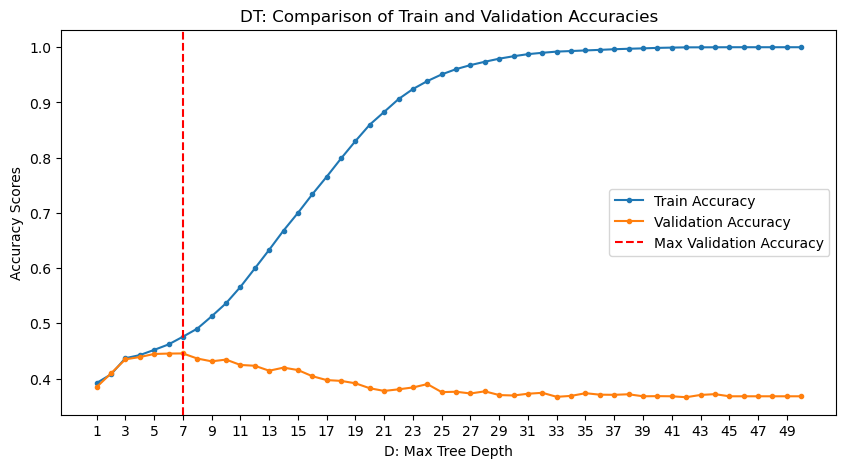

In [131]:
#plot the train and test accuracies for a visual of the best max tree depth to use moving forward

plt.figure(figsize=(10,5))

# plot the train and test accuracies separate
plt.plot(max_depth, train_acc,label="Train Accuracy",marker='.')
plt.plot(max_depth, val_acc,label="Validation Accuracy",marker='.')

#plot titles and scales
plt.title('DT: Comparison of Train and Validation Accuracies')
plt.xlabel('D: Max Tree Depth')
plt.xticks(max_depth[::2])
plt.ylabel('Accuracy Scores')

# Find the max depth value for max val accuracy
max_val_score_index = val_acc.index(max(val_acc))
n_value_val_test = max_depth[max_val_score_index]

# Add a vertical line at max val accuracy
plt.axvline(x=n_value_val_test, color='r', linestyle='--', label='Max Validation Accuracy')

plt.legend()
plt.show()

In [132]:
#find the best train and val accuracies
print(f'Max Training Accuracy at Max Validation Accuracy: {train_acc[val_acc.index(max(val_acc))]}')
print(f'Max Validation Accuracy: {max(val_acc)}, at Max Tree Depth: {max_depth[val_acc.index(max(val_acc))]}')

Max Training Accuracy at Max Validation Accuracy: 0.4757458161532864
Max Validation Accuracy: 0.44544131910766244, at Max Tree Depth: 7


---
Next lets fit the optimized model of max_depth = 7 to our full train and test data.

In [134]:
#instantiate the model
baseline_DT = DecisionTreeClassifier(max_depth=7, random_state=1)

#fit the model to full train data set
baseline_DT.fit(X_train_full, y_train_full)

DecisionTreeClassifier(max_depth=7, random_state=1)

In [135]:
# Score on the full train set 
print(f' Baseline DT train score:{baseline_DT.score(X_train_full, y_train_full)}')
    
# Score on the test set 
print(f' Baseline DT test score:{baseline_DT.score(X_test, y_test)}')

 Baseline DT train score:0.472012029491657
 Baseline DT test score:0.4300678952473327


In [136]:
#add the scores to the scores list:

add_scores('DT Baseline', 'baseline_DT', 
           baseline_DT.score(X_train_full, y_train_full), baseline_DT.score(X_test, y_test),scores_list, 8)

In [137]:
#sanity check
scores_list

[{'Name': 'Logistic Regression Baseline',
  'Model': 'baseline_logreg',
  'Train Score': 0.57828871,
  'Test Score': 0.55984481},
 {'Name': 'KNN Baseline',
  'Model': 'baseline_KNN',
  'Train Score': 0.4709449,
  'Test Score': 0.41066925},
 {'Name': 'DT Baseline',
  'Model': 'baseline_DT',
  'Train Score': 0.47201203,
  'Test Score': 0.4300679}]

In [138]:
#lets check the metrics classification report to see how the other metrics performed:

#import necessary libraries:
from sklearn.metrics import classification_report

#get the predicted values
y_pred = baseline_DT.predict(X_test)

#create the metrics report
report_baseline_DT = classification_report(y_test, y_pred)

print(report_baseline_DT)

              precision    recall  f1-score   support

           1       0.52      0.46      0.49      1565
           2       0.38      0.57      0.46      1588
           3       0.42      0.33      0.37      1411
           4       0.47      0.19      0.27       591

    accuracy                           0.43      5155
   macro avg       0.45      0.39      0.40      5155
weighted avg       0.44      0.43      0.42      5155



**Observations**:

---
As we can see from above, this is a much worse model than the log regression. At a max depth of 7, the DT model shows a train accuracy of 0.4720 and a  test accuracy of 0.4301. This means the model is slightly overfitting and it is not as good as my baseline logistic regression model. Based on the Precision, Recall and f1-score, this baseline DT model does poorly with group 4 but better than my KNN model. I will need to do some more hyper parameter tuning and feature selection/engineering to improve the performance.


---
Next I will fit a Random Forest Classifier with varying number of trees

In [141]:
#import necessary libraries
from sklearn.ensemble import RandomForestClassifier

#set a range for number of trees
n_range = range(1, 50, 2)

#instantiate empty lists to store the scores
train_scores = []
val_scores = []

#set up a for loop to test the range of number of trees
for n in n_range:
    RF_model = RandomForestClassifier(n_estimators = n)
    RF_model.fit(X_train, y_train)
    train_scores.append(RF_model.score(X_train, y_train))
    val_scores.append(RF_model.score(X_val, y_val))

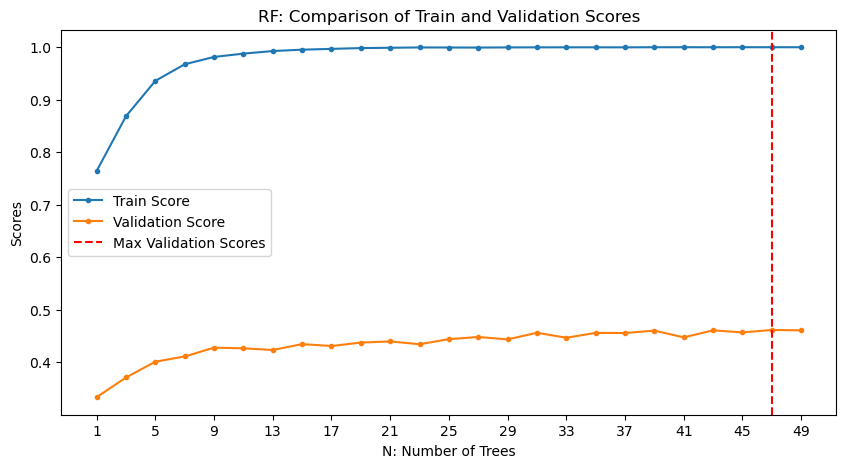

In [142]:
#plot the train and test accuracies for a visual of the best max tree depth to use moving forward

plt.figure(figsize=(10,5))

# plot the train and test scores separate
plt.plot(n_range, train_scores,label="Train Score",marker='.')
plt.plot(n_range, val_scores,label="Validation Score",marker='.')

#plot titles and scales
plt.title('RF: Comparison of Train and Validation Scores')
plt.xlabel('N: Number of Trees')
plt.xticks(n_range[::2])
plt.ylabel('Scores')

# Find the number of trees value for max val scores
max_val_score_index = val_scores.index(max(val_scores))
n_value_val_test = n_range[max_val_score_index]

# Add a vertical line at max val scores
plt.axvline(x=n_value_val_test, color='r', linestyle='--', label='Max Validation Scores')

plt.legend()
plt.show()

**Observations**:

---
Based on the Random Forest Classifier, this severly overfits the model to the training data. I will do some more testing with this once I have done more feature engineering to see if we can make this a better model but for now we will stop here with this model.

## Conclusions and Next Steps:<a class="anchor" id="conclusions"></a>
---

Based on my baseline models, my sklean Logistic Regression is the best model so far.  I will need to do some more feature selection and engineering as seen in my modelling workbook where I looked at p-values to determine which were significant for my model.  There was a bug that I could not figure out causing all my values from my MNLogistic Regression model summary. I will need to work on this so I can further select features out that do not significantly add to my models performance and may be causing it to perform poorly. 

From my log regression and my feature selection and engineering the model is performing much better than it was in my other iterations (see workbooks `Modelling` and `Modelling Test`). 

My next steps will be:
- Fix MNLogit regression classifier to further remove features causing poor performance.
- After more feature selection, refit the models to see if they perform better
- Tune hyperparameters for best performing models using GridSearch
- Use other models such as XGBoost or neural networks.

In [143]:
#lets save the data as a CSV for further work at the next iteration
df.to_csv('/Users/RahimKaba/Desktop/Cancer_Survivability_Predictor/Data/cancer_data_sprint2.csv')
